In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# folder structure
base = "/content/drive/MyDrive/ds_usha"
csv_path = f"{base}/csv_files"
output_path = f"{base}/outputs"

os.makedirs(csv_path, exist_ok=True)
os.makedirs(output_path, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

sentiment_df = pd.read_csv("/content/drive/MyDrive/fear_greed_index.csv")
trader_df = pd.read_csv("/content/drive/MyDrive/historical_data.csv")

sentiment_df.head(), trader_df.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [ ]:
sentiment_df['data']=pd.to_datetime(sentiment_df['timestamp'], unit='s').dt.date
sentiment_df['classification']=sentiment_df['classification'].str.strip()
sentiment_df=sentiment_df[['date', 'classification', 'value']]
sentiment_df.head()

,date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


In [ ]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp'], unit='ms').dt.date
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df = trader_df[['Account', 'Coin', 'Execution Price', 'Size USD',
                       'Side', 'Closed PnL', 'Fee', 'date']]

trader_df.head()


,Account,Coin,Execution Price,Size USD,Side,Closed PnL,Fee,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,2024-10-27


In [ ]:
merged_df = trader_df.merge(sentiment_df, on='date', how='left')
merged_df.head()


,Account,Coin,Execution Price,Size USD,Side,Closed PnL,Fee,date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,2024-10-27,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,2024-10-27,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,2024-10-27,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,2024-10-27,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,2024-10-27,NaN,NaN


In [ ]:
merged_df['profitable'] = merged_df['Closed PnL'] > 0
merged_df['abs_pnl'] = merged_df['Closed PnL'].abs()


In [ ]:
winrate = merged_df.groupby('classification')['profitable'].mean() * 100
winrate


,profitable
classification,


In [ ]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
avg_pnl


,Closed PnL
classification,


In [ ]:
volume = merged_df.groupby('classification')['Size USD'].sum()
volume


,Size USD
classification,


In [ ]:
winrate.to_csv(f"{csv_path}/winrate.csv")
avg_pnl.to_csv(f"{csv_path}/avg_pnl.csv")
volume.to_csv(f"{csv_path}/volume.csv")


In [ ]:
sentiment_df['date'].head(), sentiment_df['date'].tail()


(0    2018-02-01
 1    2018-02-02
 2    2018-02-03
 3    2018-02-04
 4    2018-02-05
 Name: date, dtype: object,
 2639    2025-04-28
 2640    2025-04-29
 2641    2025-04-30
 2642    2025-05-01
 2643    2025-05-02
 Name: date, dtype: object)

In [ ]:
trader_df['date'].head(), trader_df['date'].tail()


(0    2024-10-27
 1    2024-10-27
 2    2024-10-27
 3    2024-10-27
 4    2024-10-27
 Name: date, dtype: object,
 211219    2025-06-15
 211220    2025-06-15
 211221    2025-06-15
 211222    2025-06-15
 211223    2025-06-15
 Name: date, dtype: object)

In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['date'] = pd.to_datetime(trader_df['date'])


In [ ]:
sentiment_df = sentiment_df.sort_values('date')
trader_df = trader_df.sort_values('date')


In [ ]:
merged_df = pd.merge_asof(
    trader_df,
    sentiment_df,
    on='date',
    direction='nearest'
)


In [ ]:
merged_df['classification'].unique()


array(['Greed', 'Extreme Greed', 'Neutral', 'Fear'], dtype=object)

In [ ]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['profitable'] = merged_df['Closed PnL'] > 0
merged_df['abs_pnl'] = merged_df['Closed PnL'].abs()


In [ ]:
winrate = merged_df.groupby('classification')['profitable'].mean() * 100
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
volume = merged_df.groupby('classification')['Size USD'].sum()


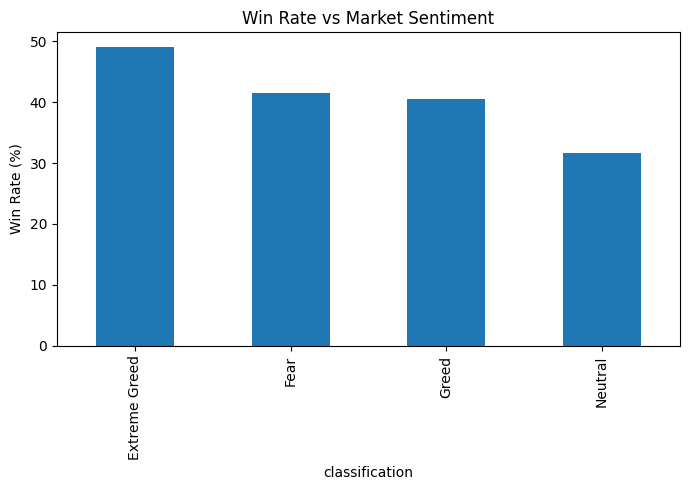

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
winrate.plot(kind='bar')
plt.title("Win Rate vs Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.tight_layout()
plt.savefig(f"{output_path}/winrate_sentiment.png")
plt.show()


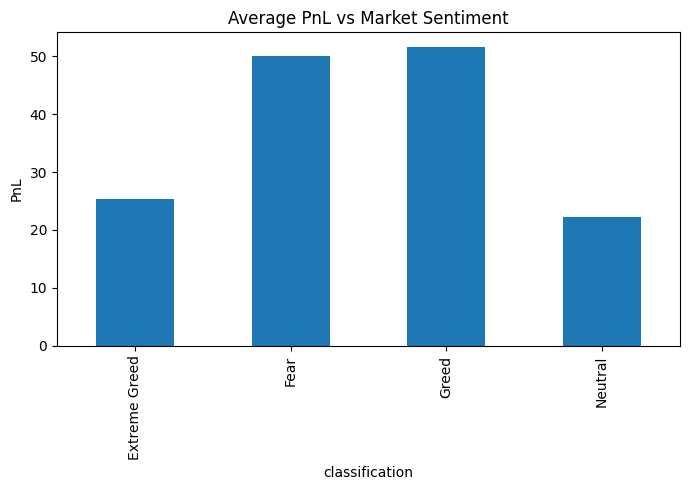

In [ ]:
plt.figure(figsize=(7,5))
avg_pnl.plot(kind='bar')
plt.title("Average PnL vs Market Sentiment")
plt.ylabel("PnL")
plt.tight_layout()
plt.savefig(f"{output_path}/avg_pnl_sentiment.png")
plt.show()


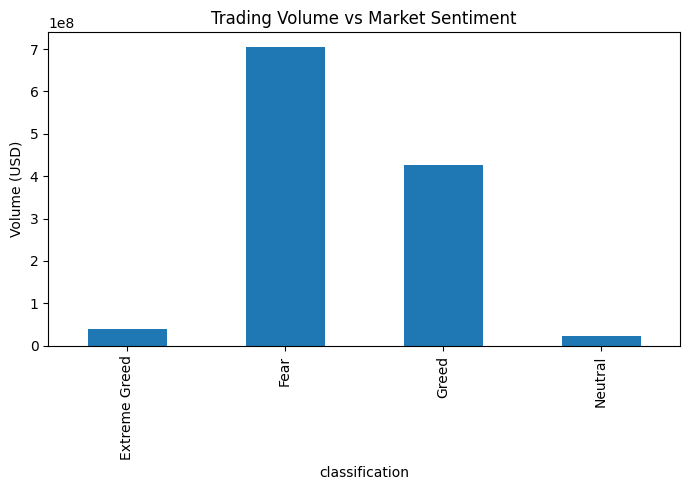

In [ ]:
plt.figure(figsize=(7,5))
volume.plot(kind='bar')
plt.title("Trading Volume vs Market Sentiment")
plt.ylabel("Volume (USD)")
plt.tight_layout()
plt.savefig(f"{output_path}/volume_sentiment.png")
plt.show()


In [ ]:
merged_df.to_csv(f"{csv_path}/merged_trader_sentiment.csv", index=False)
